In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.00836892 0.00167683 0.0051857  ... 0.00449072 0.00844742 0.00866093]
 [0.17958996 0.03598337 0.11128086 ... 0.096367   0.18127454 0.18585623]
 [0.29634051 0.05937599 0.18362399 ... 0.15901472 0.29912022 0.30668045]
 ...
 [0.59260236 0.11873621 0.36719924 ... 0.31798723 0.59816105 0.61327949]
 [0.12919394 0.02588582 0.08005354 ... 0.06932477 0.13040579 0.13370178]
 [0.23562402 0.04721059 0.14600172 ... 0.12643458 0.2378342  0.24384544]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.13966098  0.0304909   0.35876013 ...  0.07497425 -0.18865794
  -0.0423835 ]
 [ 0.04817096  0.14648711  0.07229127 ...  0.22366083  0.16577246
   0.11457124]
 [ 0.38567153  0.03290166  0.14386937 ...  0.13276682  0.21681364
   0.47263837]
 ...
 [ 0.62854332  0.02493682  0.39097034 ...  0.49366542  0.50232167
   0.57469402]
 [ 0.20750761  0.12853212  0.20618251 ...  0.207357    0.29871061
   0.09344857]
 [ 0.27220771 -0.13991992  0.29473096 ... -0.05815602  0.21380664
   0.19

In [2]:
print(u)

[0.01157225 0.24833077 0.40976937 0.88502232 0.57428453 0.20056149
 0.86415517 0.97918225 0.5927087  0.08995185 0.7402262  0.27734796
 0.59058607 0.08655999 0.20500588 0.00314063 0.0691408  0.5029676
 0.04929191 0.16170852 0.57838901 0.81384622 0.50004667 0.05653186
 0.77031064 0.60103214 0.3823458  0.44214651 0.41408504 0.4544513
 0.72524725 0.44832753 0.77237349 0.64280828 0.4178817  0.81980479
 0.67564703 0.19355023 0.63663922 0.62847775 0.14165019 0.56263535
 0.92564409 0.96400495 0.92141119 0.90521615 0.58458238 0.81942998
 0.17864489 0.32581272]


In [3]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [4]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp")
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF()
U
mycebmf.L
 

The array does not contain any missing values.


array([[-4.46482855e-02,  2.92092193e-01, -1.45596274e-01,
        -1.23910163e-01, -9.12134826e-02],
       [-8.64328740e-01, -2.10658094e-01,  3.06817598e-01,
         3.29276565e-02, -3.70376253e-02],
       [-1.38446199e+00,  2.60894577e-01, -2.43775809e-02,
        -2.29269967e-01,  7.06216847e-02],
       [-3.21054891e+00, -1.46657791e-01, -3.80877162e-02,
         1.91220585e-01, -8.20041146e-02],
       [-2.11914201e+00, -1.07959517e-01,  3.56459838e-02,
        -3.16763680e-01,  1.31019212e-01],
       [-7.60083520e-01, -2.08221369e-02, -1.31002232e-01,
         2.85266522e-02,  6.90282328e-02],
       [-3.22566868e+00,  9.85446763e-02, -2.68949772e-02,
         1.01803618e-01,  2.70938113e-02],
       [-3.68633168e+00, -3.59057150e-01, -1.07206524e-01,
        -1.72565536e-01, -2.21843307e-01],
       [-2.08696521e+00,  5.69288579e-02,  4.87983640e-02,
        -1.04530372e-02, -5.40909613e-02],
       [-3.77605670e-01,  1.81843882e-01,  8.01941430e-02,
        -2.13448664e-02

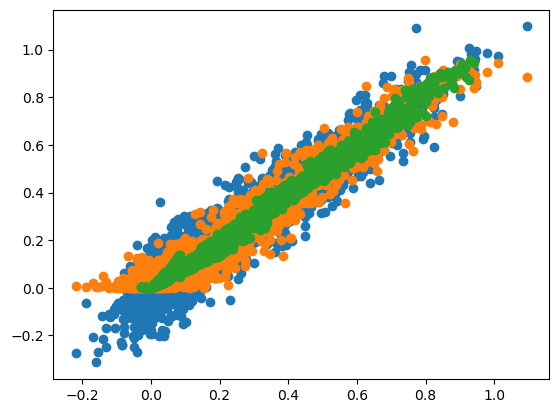

In [5]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [6]:
mycebmf.F

array([[-0.20235279,  0.21337164, -0.20615071,  0.00628275, -0.03985907],
       [-0.04369733, -0.22113262,  0.037058  , -0.40627694, -0.17699032],
       [-0.11654559,  0.01526959,  0.00705334, -0.08138447, -0.10037954],
       [-0.05878724,  0.07220346, -0.05034674,  0.01727178,  0.09597676],
       [-0.23487328, -0.15241141,  0.06164227,  0.03612941,  0.07713415],
       [-0.17118407, -0.21747263, -0.19052893, -0.0292333 , -0.07457115],
       [-0.05991743, -0.12793585,  0.10792097,  0.0782122 ,  0.27245484],
       [-0.01108673, -0.12951967,  0.01763253,  0.04927967,  0.05687395],
       [-0.23619098, -0.11111531,  0.0546346 ,  0.10263281, -0.26781153],
       [-0.19755871,  0.25266123, -0.15177285,  0.05368867, -0.31990037],
       [-0.19927246,  0.06086986,  0.13794232, -0.32942092,  0.11592746],
       [-0.01714227,  0.21285187, -0.20756678, -0.20764034, -0.39505791],
       [-0.10554682,  0.03985181, -0.16658055, -0.32422346,  0.38518565],
       [-0.0639995 ,  0.07219112, -0.0

In [7]:
mycebmf.iter()

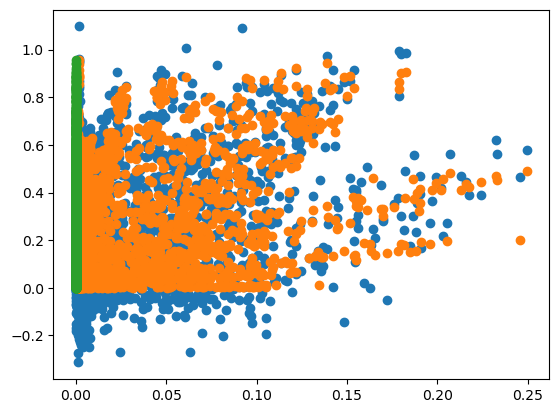

In [8]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [9]:
for i in range(40):
    mycebmf.iter()


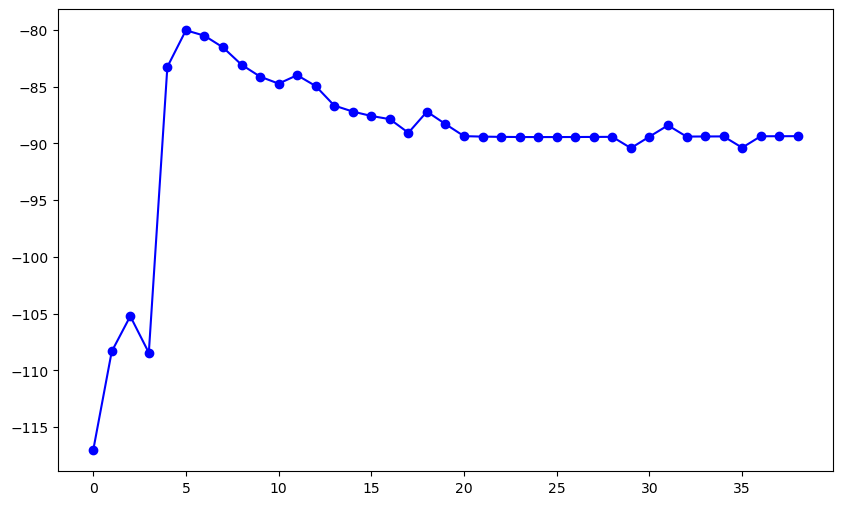

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[3:], marker='o', linestyle='-', color='b')

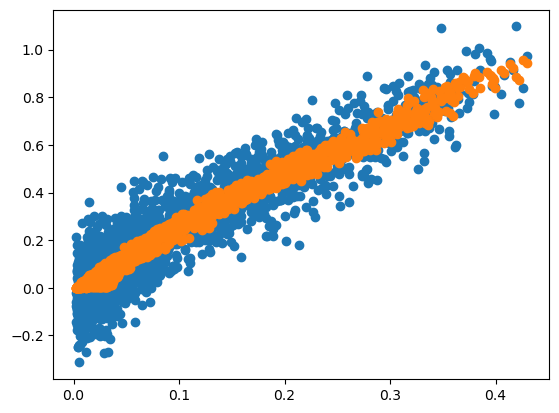

In [11]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)


-7055.10064646649


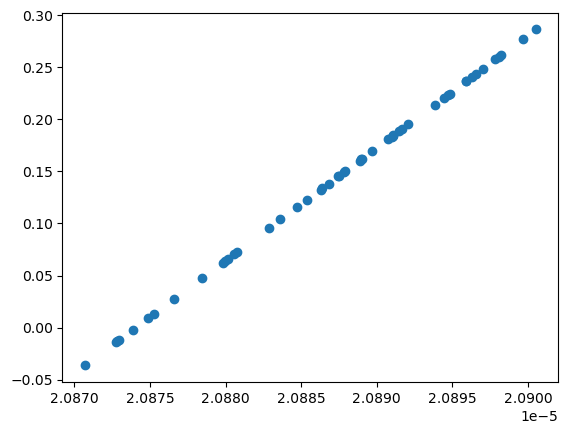

In [12]:
k=0
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 

ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
 
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
print(ash_obj.log_lik2  
      )
plt.scatter(ash_obj.post_mean, lhat)

In [13]:
normal_means_loglik(x=lhat , 
                                            s=  s_l,
                                            Et=ash_obj.post_mean,
                                            Et2= ash_obj.post_mean2
                                           )

-240.48120601323882

In [14]:
ash_obj.log_lik


-240.48120610597624

In [15]:
x=lhat

s=  s_l
Et=ash_obj.post_mean
Et2= ash_obj.post_mean2
print(Et2)
print(Et[12])
lhat[11] 




[0.00022095 0.00022106 0.00022114 0.00022136 0.00022121 0.00022107
 0.00022133 0.0002214  0.00022121 0.00022101 0.0002213  0.00022112
 0.00022124 0.00022099 0.00022104 0.00022091 0.00022095 0.00022119
 0.00022096 0.00022107 0.00022121 0.00022132 0.00022119 0.00022095
 0.0002213  0.00022124 0.00022117 0.00022119 0.00022117 0.00022117
 0.00022129 0.00022118 0.00022132 0.00022124 0.00022115 0.0002213
 0.00022125 0.00022106 0.00022126 0.00022125 0.00022098 0.00022122
 0.00022136 0.00022138 0.00022135 0.00022134 0.00022124 0.00022133
 0.00022108 0.00022111]
2.089110027587903e-05


0.10385537001599322

In [16]:
-0.5 * np.sum(np.log(2 * np.pi * s**2) + (1 / s**2) * (Et2 - 2 * x * Et + x**2))

-240.48120601323882

In [17]:
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
print(ash_obj.log_lik)


-240.48120610597624


In [18]:
ash_obj.pi

array([9.99995938e-01, 3.30265587e-06, 6.73741488e-07, 8.14539010e-08,
       4.02873787e-09, 4.97199381e-11, 9.02404328e-14, 1.50538715e-17])

In [19]:
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
print(prior)

scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
print(optimal_pi)

exp
Converged after 64 iterations.
[9.99995938e-01 3.30265587e-06 6.73741488e-07 8.14539010e-08
 4.02873787e-09 4.97199381e-11 9.02404328e-14 1.50538715e-17]


[2.08729307e-05 2.08798129e-05 2.08847377e-05 2.08980650e-05
 2.08889568e-05 2.08801384e-05 2.08965547e-05 2.09005097e-05
 2.08890264e-05 2.08765865e-05 2.08944236e-05 2.08836315e-05
 2.08911003e-05 2.08752700e-05 2.08784216e-05 2.08707019e-05
 2.08727303e-05 2.08879070e-05 2.08738681e-05 2.08805911e-05
 2.08888554e-05 2.08959226e-05 2.08878361e-05 2.08728210e-05
 2.08948101e-05 2.08909722e-05 2.08863819e-05 2.08875262e-05
 2.08868132e-05 2.08862874e-05 2.08938222e-05 2.08874647e-05
 2.08958787e-05 2.08910369e-05 2.08853774e-05 2.08946954e-05
 2.08916759e-05 2.08799330e-05 2.08920770e-05 2.08914459e-05
 2.08748895e-05 2.08897059e-05 2.08982157e-05 2.08996653e-05
 2.08978343e-05 2.08970054e-05 2.08907444e-05 2.08962620e-05
 2.08807651e-05 2.08828548e-05]


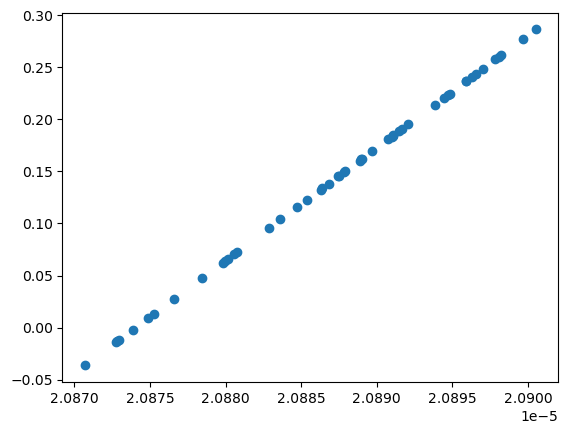

In [20]:
optimal_pi
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat= betahat ,
                        sebetahat=sebetahat ,
                                 log_pi=log_pi , 
                                 scale=scale)
plt.scatter(out.post_mean, lhat)
print(out.post_mean)


In [21]:
print(  np.sum(np.exp(L)*optimal_pi, axis=1) )

[0.00815097 0.00815096 0.00815095 0.00815086 0.00815093 0.00815096
 0.00815087 0.00815083 0.00815093 0.00815097 0.00815089 0.00815095
 0.00815091 0.00815097 0.00815097 0.00815097 0.00815097 0.00815093
 0.00815097 0.00815096 0.00815093 0.00815088 0.00815093 0.00815097
 0.00815089 0.00815091 0.00815094 0.00815093 0.00815094 0.00815094
 0.00815089 0.00815094 0.00815088 0.00815091 0.00815095 0.00815089
 0.00815091 0.00815096 0.00815091 0.00815091 0.00815097 0.00815092
 0.00815085 0.00815084 0.00815086 0.00815087 0.00815092 0.00815087
 0.00815096 0.00815096]


In [22]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
print( np.exp(L)*optimal_pi )

[[8.15093813e-03 2.66577052e-08 5.38764234e-09 6.40024333e-10
  3.06725738e-11 3.58900143e-13 5.99364616e-16 8.87088943e-20]
 [8.15093174e-03 2.66616703e-08 5.38875721e-09 6.40205807e-10
  3.06842119e-11 3.59076478e-13 5.99731045e-16 8.87735991e-20]
 [8.15091555e-03 2.66644692e-08 5.38954725e-09 6.40334760e-10
  3.06924978e-11 3.59202192e-13 5.99992535e-16 8.88198051e-20]
 [8.15082326e-03 2.66718826e-08 5.39165284e-09 6.40679932e-10
  3.07147441e-11 3.59540437e-13 6.00697151e-16 8.89444439e-20]
 [8.15089399e-03 2.66668416e-08 5.39021895e-09 6.40444633e-10
  3.06995684e-11 3.59309582e-13 6.00216078e-16 8.88593265e-20]
 [8.15093097e-03 2.66618564e-08 5.38880963e-09 6.40214355e-10
  3.06847607e-11 3.59084800e-13 5.99748349e-16 8.87766560e-20]
 [8.15083727e-03 2.66710543e-08 5.39141660e-09 6.40641094e-10
  3.07122360e-11 3.59502249e-13 6.00617523e-16 8.89303488e-20]
 [8.15079865e-03 2.66732170e-08 5.39203395e-09 6.40742647e-10
  3.07187969e-11 3.59602171e-13 6.00825921e-16 8.89672429e-20]


In [23]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)

print(L)

threshold_loglikelihood =  -300  # Example of a very small threshold
L = np.maximum(L,  (threshold_loglikelihood))
print(L)
log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))

[[-4.80961819 -4.819404   -4.82873861 -4.84628631 -4.87783953 -4.9311171
  -5.01436274 -5.13403032]
 [-4.80961897 -4.81925527 -4.8285317  -4.84600281 -4.87746017 -4.93062591
  -5.01375157 -5.13330118]
 [-4.80962096 -4.81915029 -4.8283851  -4.84580141 -4.87719017 -4.93027586
  -5.01331565 -5.13278083]
 [-4.80963228 -4.81887231 -4.8279945  -4.8452625  -4.87646562 -4.92933465
  -5.01214196 -5.13137853]
 [-4.8096236  -4.81906133 -4.82826048 -4.84562983 -4.87695983 -4.92997694
  -5.01294314 -5.13233596]
 [-4.80961907 -4.81924829 -4.82852197 -4.84598946 -4.87744228 -4.93060273
  -5.01372271 -5.13326675]
 [-4.80963056 -4.81890336 -4.82803832 -4.84532312 -4.87654728 -4.92944087
  -5.01227453 -5.13153701]
 [-4.8096353  -4.81882228 -4.82792382 -4.84516462 -4.87633368 -4.92916296
  -5.01192762 -5.13112224]
 [-4.80962365 -4.81905987 -4.82825844 -4.84562701 -4.87695604 -4.92997202
  -5.01293701 -5.13232864]
 [-4.80961832 -4.8193247  -4.82862841 -4.84613542 -4.87763772 -4.93085589
  -5.0140378  -5.1

In [24]:
np.exp(L[1,]) 

array([0.00815096, 0.0080728 , 0.00799826, 0.00785973, 0.00761633,
       0.00722198, 0.00664592, 0.00589706])

In [25]:
i=6
print(scale)
print(betahat[i]/sebetahat[i])
convolved_logpdf_exp(betahat=betahat[i],
                                         sebetahat=sebetahat[i],  
                                         scale=scale)

[ 0.          4.89441388  6.92174649  9.78882777 13.84349299 19.57765554
 27.68698598 39.15531107]
0.004981034489645396


array([-4.80963056, -4.81890336, -4.82803832, -4.84532312, -4.87654728,
       -4.92944087, -5.01227453, -5.13153701])